In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

Error in sys.excepthook:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1979, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1981, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/ultratb.py", line 851, in structured_traceback
    assert etb is not None
Assertio

In [3]:
from torch.utils.data import Dataset
import torch.utils.data as data
import os
import matplotlib.image as mpimg
torch.cuda.is_available()

True

In [4]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)

cuda:1


In [5]:
np.random.seed(0)
torch.manual_seed(0)

In [6]:
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
root_dir = "/workspace/Shantan_Data/Bayesian2v/Auto1/All/"
print("The data lies here =>", root_dir)

The data lies here => /workspace/Shantan_Data/Bayesian2v/Auto1/All/


In [8]:
image_transforms = {"train": transforms.Compose([transforms.ToTensor(),transforms.Resize((32, 32)),transforms.Normalize([0.5], [0.5])])}

In [42]:
from torchvision.datasets import ImageFolder

In [50]:
dataset = ImageFolder(root=root_dir,target_transform=None, transform=image_transforms["train"],is_valid_file=None)
dataset

RuntimeError: Found 0 files in subfolders of: /workspace/Shantan_Data/Bayesian2v/Auto1/All/
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp

In [45]:
class AutoDataset(Dataset):
    def __init__(self,csv_file,root_dir,transform=None,target_transform=None,device='cuda'):
        self.annotations = pd.read_csv(csv_file)
        self.img_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = mpimg.imread(img_path)
        label = self.annotations.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [10]:
dataset = AutoDataset(csv_file='/workspace/Shantan_Data/Bayesian2v/Automotivee/Auto_Diff.csv',root_dir="/workspace/Shantan_Data/Bayesian2v/Auto1/All",target_transform=None,transform = image_transforms["train"])


In [11]:
class_to_idx= {'Good_parts':0,'Cut_Mark':1,'Dent_Mark':2,'Peel_Off':3}

In [12]:
idx2class = {v: k for k, v in class_to_idx.items()}
idx2class 

{0: 'Good_parts', 1: 'Cut_Mark', 2: 'Dent_Mark', 3: 'Peel_Off'}

In [13]:
proportions = [.90, .10]
lengths = [int(p * len(dataset)) for p in proportions]
lengths[-1] = len(dataset) - sum(lengths[:-1])
train_set, test_set = data.random_split(dataset, lengths)

In [18]:
print(len(train_set))

565


In [19]:
print(len(test_set))

63


In [14]:
batch_size=32
num_workers =6

In [15]:
trainloader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=6)
testloader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=6)

In [17]:
print("Length of the train_loader:", len(trainloader))
print("Length of the val_loader:", len(testloader))

Length of the train_loader: 18
Length of the val_loader: 2


In [27]:
def get_class_distribution(dataset):
    count_dict = {k:0 for k,v in dataset.class_to_idx.items()}
    
    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = idx2class[y_lbl]
        count_dict[y_lbl] += 1
            
    return count_dict
print("Distribution of classes: \n", get_class_distribution(dataset))

AttributeError: 'AutoDataset' object has no attribute 'class_to_idx'

In [28]:
def get_class_distribution_loaders(Dataloader, dataset):
    count_dict = {k:0 for k,v in dataset.class_to_idx.items()}
    
    for _,j in dataloader_obj:
        y_idx = j.item()
        y_lbl = idx2class[y_idx]
        count_dict[str(y_lbl)] += 1
            
    return count_dict

AttributeError: 'AutoDataset' object has no attribute 'class_to_idx'

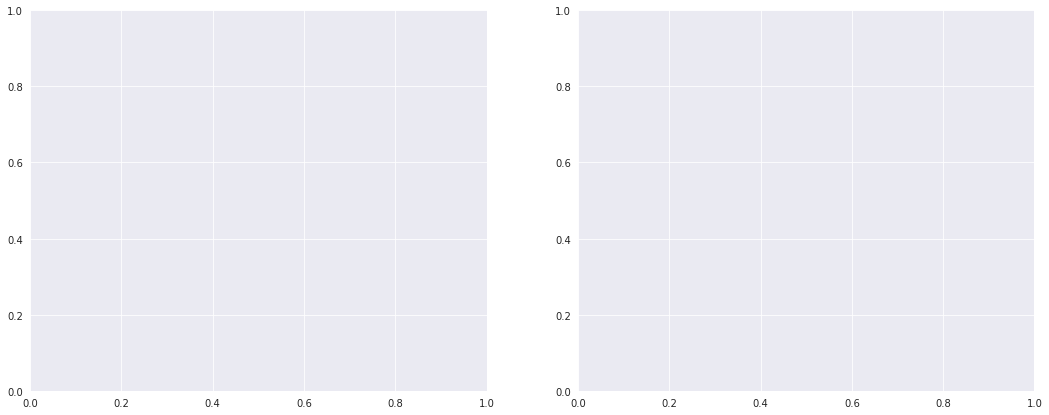

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution_loaders(trainloader, dataset)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('train_set')
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution_loaders(testloader, dataset)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('test_set')

In [30]:
target_list = torch.tensor(dataset.targets)

AttributeError: 'AutoDataset' object has no attribute 'targets'

In [31]:
class_count = [i for i in get_class_distribution(dataset).values()]

AttributeError: 'AutoDataset' object has no attribute 'class_to_idx'

In [32]:
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
class_weights

NameError: name 'class_count' is not defined

In [33]:
class_weights_all = class_weights[target_list]

NameError: name 'class_weights' is not defined

In [34]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

NameError: name 'class_weights_all' is not defined

In [36]:
train_loader = DataLoader(dataset=dataset, shuffle=False, batch_size=8, sampler=weighted_sampler)

NameError: name 'weighted_sampler' is not defined